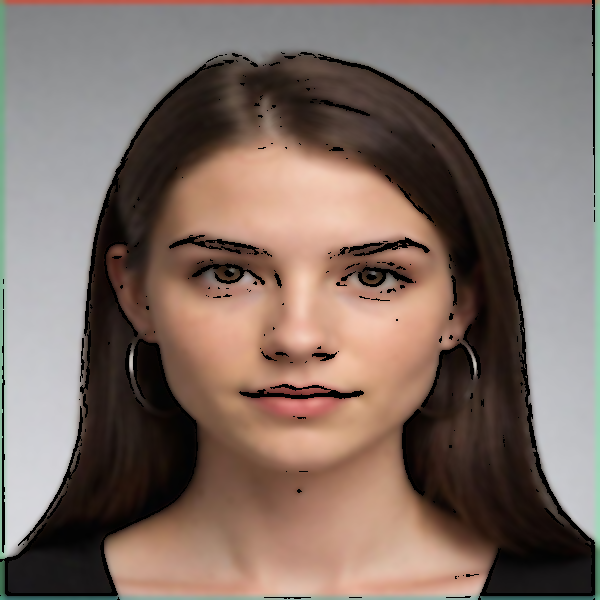

In [24]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('image.jpeg')

# Resize for consistency
image = cv2.resize(image, (600, 600))

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply median blur
gray_blur = cv2.medianBlur(gray, 5)

# Detect edges using adaptive thresholding
edges = cv2.adaptiveThreshold(gray_blur, 255,
                              cv2.ADAPTIVE_THRESH_MEAN_C,
                              cv2.THRESH_BINARY, 9, 9)

# Apply bilateral filter to smooth the image and reduce noise
color = cv2.bilateralFilter(image, d=9, sigmaColor=300, sigmaSpace=300)

# Combine edges and smoothed image
cartoon = cv2.bitwise_and(color, color, mask=edges)

# Save the cartoon image
cv2.imwrite("cartoonified_image.jpg", cartoon)

# Display result in Colab
cv2_imshow(cartoon)
